# Analysis of *Fortune India 500 Companies* 

### Objective of the Study

- To give the essential thought regarding
the Fortune India and its analysis.
- My point is to figure out the meaningful
insights from the data and to highlight
the important information.



### About Dataset

**Title:** Fortune India 500 Companies

- The Fortune India 500 is a ranking of the top 500 corporations in India compiled on the basis of latest sales and gross         revenue figures. The list is published annually by Fortune magazine.

- The Fortune India 500 list ranks publicly traded companies by their annual audited total income for the financial year ending   on or before 30 June. The list has been published in its current form since 2010, and also includes financial corporations     and service providers, leading by revenue.

**Dataset:** [https://www.fortuneindia.com/fortune-500/company-listing?year=2021](https://www.fortuneindia.com/fortune-500/company-listing?year=2021)

**Features:** The dataset contains 500 rows and 10 columns
  
**Data Type:** Mixed (Numerical + Catagorical)
        

### Import requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### Scraping the web pages

In [2]:
Rank=[]
C_Name=[]
Sector=[]
Revenue=[]
Net_Income=[]
Profit=[]
Assets=[]
Employees=[]
ROCE=[]
Debt=[]

URL='https://www.fortuneindia.com/fortune-500/company-listing/?year=2020&page=1&query=&per_page=500'
page = requests.get(URL)
htmlCode = page.text
soup = BeautifulSoup(htmlCode)

rank=soup.find_all('td',attrs={'f-500-row-td serial-num'})
for item in rank:
    Rank.append(item.text)
name=soup.find_all('a',attrs={'company-name'})
for item in name:
    C_Name.append(item.text)
sector=soup.find_all('td',attrs={'f-500-row-td industry'})
for item in sector:
    Sector.append(item.text)
revenue=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in revenue:
    Revenue.append(item.text)
netincome=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in netincome:
    Net_Income.append(item.text)
profit=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in profit:
    Profit.append(item.text)
asset=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in asset:
    Assets.append(item.text)
emp=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in emp:
    Employees.append(item.text)
roce=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in roce:
    ROCE.append(item.text)
debt=soup.find_all('td',attrs={'f-500-row-td align-right'})
for item in debt:
    Debt.append(item.text)


### Converting data into DataFrame

In [58]:
data=pd.DataFrame({'Rank':Rank,'Company':C_Name,'Total_Income':Revenue[7::17],'Net_Income':Net_Income[9::17],
                'Profit':Profit[11::17],'Assets':Assets[13::17]})
data

Rank                                                   Total Income  \
    2021                    Company               industry        Rs cr   
0      1        Reliance Industries              Oil & gas       514217   
1      7  Tata Consultancy Services            IT services       167311   
2     10                  HDFC Bank                  Banks       155885   
3      2        State Bank of India                  Banks       385338   
4      3     Indian Oil Corporation              Oil & gas       374828   
..   ...                        ...                    ...          ...   
495  498          Tata Teleservices  Telecom (Ancillaries)         1982   
496   79           Reliance Capital                   NBFC        19308   
497    5                Tata Motors                   Auto       249646   
498   15              Bharti Airtel       Telecom services       112386   
499   43              Vodafone Idea       Telecom services        44646   

    Net Income Profit Total Debt Total Assets   ROCE Employees  
         Rs cr  Rs cr      Rs cr        Rs cr    (%)  (in nos)  
0       466924  49128   270648.0    1094771.0   7.81  236334.0  
1       164177  32430     7795.0      97129.0  47.10  488649.0  
2       128552  31833  1511418.0    1721861.0   1.97  120093.0  
3       278115  22405  4149127.0    4653343.0   0.52  245652.0  
4       363950  21638   116653.0     234495.0  14.55   31648.0  
..         ...    ...        ...          ...    ...       ...  
495       1605  -8901    18702.0       1286.0   0.00    1200.0  
496      19252  -9404    26887.0      16086.0   0.00   18360.0  
497     249795 -13451   142131.0     227426.0   5.07   50837.0  
498     100616 -15084   162785.0     259898.0   0.00    9691.0  
499      41952 -44233    29379.0     159971.0   0.00    9174.0  

[500 rows x 10 columns]

### Save the dataframe into CSV file

In [336]:
data.to_csv('FortuneIndia500Companies.csv')
data

,Unnamed: 0,Rank,Unnamed: 2,Unnamed: 3,Total Income,Net Income,Profit,Total Debt,Total Assets,ROCE,Employees
0,NaN,2021,Company,industry,Rs cr,Rs cr,Rs cr,Rs cr,Rs cr,(%),(in nos)
1,0.0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
2,1.0,7,Tata Consultancy Services,IT services,167311,164177,32430,7795.0,97129.0,47.1,488649.0
3,2.0,10,HDFC Bank,Banks,155885,128552,31833,1511418.0,1721861.0,1.97,120093.0
4,3.0,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
...,...,...,...,...,...,...,...,...,...,...,...
496,495.0,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.0,1200.0
497,496.0,79,Reliance Capital,NBFC,19308,19252,-9404,26887.0,16086.0,0.0,18360.0
498,497.0,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
499,498.0,15,Bharti Airtel,Telecom services,112386,100616,-15084,162785.0,259898.0,0.0,9691.0


### Cleaning the data

In [9]:
# Load the Dataset
df=pd.read_csv('FortuneIndia500Companies.csv')

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,Rank,Unnamed: 2,Unnamed: 3,Total Income,Net Income,Profit,Total Debt,Total Assets,ROCE,Employees
0,0,NaN,2021,Company,industry,Rs cr,Rs cr,Rs cr,Rs cr,Rs cr,(%),(in nos)
1,1,0.0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
2,2,1.0,7,Tata Consultancy Services,IT services,167311,164177,32430,7795.0,97129.0,47.1,488649.0
3,3,2.0,10,HDFC Bank,Banks,155885,128552,31833,1511418.0,1721861.0,1.97,120093.0
4,4,3.0,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,495.0,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.0,1200.0
497,497,496.0,79,Reliance Capital,NBFC,19308,19252,-9404,26887.0,16086.0,0.0,18360.0
498,498,497.0,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
499,499,498.0,15,Bharti Airtel,Telecom services,112386,100616,-15084,162785.0,259898.0,0.0,9691.0


### Remove unwanted columns

In [12]:
del df['Unnamed: 0']

In [13]:
del df['Unnamed: 0.1']

In [14]:
ds=df.drop(0)

In [15]:
ds

,Rank,Unnamed: 2,Unnamed: 3,Total Income,Net Income,Profit,Total Debt,Total Assets,ROCE,Employees
1,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
2,7,Tata Consultancy Services,IT services,167311,164177,32430,7795.0,97129.0,47.1,488649.0
3,10,HDFC Bank,Banks,155885,128552,31833,1511418.0,1721861.0,1.97,120093.0
4,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
5,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
...,...,...,...,...,...,...,...,...,...,...
496,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.0,1200.0
497,79,Reliance Capital,NBFC,19308,19252,-9404,26887.0,16086.0,0.0,18360.0
498,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
499,15,Bharti Airtel,Telecom services,112386,100616,-15084,162785.0,259898.0,0.0,9691.0


### Rename the columns

In [16]:
ds.rename(columns={'Rank':'Rank_2021','Unnamed: 2':'Company','Unnamed: 3':'Sector','Total Income':'Total_Income',
                  'Net Income':'Net_Income','Profit':'Profit','Total Debt':'Total_Debt','Total Assets':'Total_Assets',
                  'ROCE':'ROCE','Employees':'Employees'},inplace=True)

In [17]:
ds

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
1,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
2,7,Tata Consultancy Services,IT services,167311,164177,32430,7795.0,97129.0,47.1,488649.0
3,10,HDFC Bank,Banks,155885,128552,31833,1511418.0,1721861.0,1.97,120093.0
4,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
5,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
...,...,...,...,...,...,...,...,...,...,...
496,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.0,1200.0
497,79,Reliance Capital,NBFC,19308,19252,-9404,26887.0,16086.0,0.0,18360.0
498,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
499,15,Bharti Airtel,Telecom services,112386,100616,-15084,162785.0,259898.0,0.0,9691.0


In [18]:
# Sort the Rank column in ascending order
ds=ds.sort_values('Rank_2021')
ds

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
1,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
4,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
5,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
9,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
498,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
...,...,...,...,...,...,...,...,...,...,...
404,496,Ahluwalia Contracts (India),Construction,2005,1982,77,68.0,1107.0,14.06,2214.0
444,497,Himatsingka Seide,Textiles,1994,2258,-53,2593.0,4217.0,3.4,8129.0
496,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.0,1200.0
378,499,Dodla Dairy,FMCG,1966,1944,126,99.0,768.0,28.98,2458.0


In [19]:
# Sort the Index in proper manner
ds=ds.set_index(np.arange(0,500))
ds

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
4,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
...,...,...,...,...,...,...,...,...,...,...
495,496,Ahluwalia Contracts (India),Construction,2005,1982,77,68.0,1107.0,14.06,2214.0
496,497,Himatsingka Seide,Textiles,1994,2258,-53,2593.0,4217.0,3.4,8129.0
497,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.0,1200.0
498,499,Dodla Dairy,FMCG,1966,1944,126,99.0,768.0,28.98,2458.0


### Shape of the Dataset

In [174]:
ds.shape

# Dataset is having 500 rows and 10 columns

(500, 10)

### Data Types of the columns

In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank_2021     500 non-null    int64 
 1   Company       500 non-null    object
 2   Sector        500 non-null    object
 3   Total_Income  500 non-null    object
 4   Net_Income    500 non-null    object
 5   Profit        500 non-null    object
 6   Total_Debt    500 non-null    object
 7   Total_Assets  500 non-null    object
 8   ROCE          493 non-null    object
 9   Employees     434 non-null    object
dtypes: int64(1), object(9)
memory usage: 43.0+ KB


In [35]:
# Change the columns data type into numeric
ds[['Total_Income', 'Net_Income','Profit','Total_Debt','Total_Assets','ROCE','Employees']] = ds[['Total_Income', 
                     'Net_Income','Profit','Total_Debt','Total_Assets','ROCE','Employees']].apply(pd.to_numeric)
ds

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
4,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
...,...,...,...,...,...,...,...,...,...,...
495,496,Ahluwalia Contracts (India),Construction,2005,1982,77,68.0,1107.0,14.06,2214.0
496,497,Himatsingka Seide,Textiles,1994,2258,-53,2593.0,4217.0,3.40,8129.0
497,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.00,1200.0
498,499,Dodla Dairy,FMCG,1966,1944,126,99.0,768.0,28.98,2458.0


In [47]:
# After changing the datatype of the columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_2021     500 non-null    int64  
 1   Company       500 non-null    object 
 2   Sector        500 non-null    object 
 3   Total_Income  500 non-null    int64  
 4   Net_Income    500 non-null    int64  
 5   Profit        500 non-null    int64  
 6   Total_Debt    500 non-null    float64
 7   Total_Assets  500 non-null    float64
 8   ROCE          493 non-null    float64
 9   Employees     434 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 43.0+ KB


### Column Names

In [37]:
ds.columns

Index(['Rank_2021', 'Company', 'Sector', 'Total_Income', 'Net_Income',
       'Profit', 'Total_Debt', 'Total_Assets', 'ROCE', 'Employees'],
      dtype='object')

In [38]:
# Column names using list comprehension
[features for features in ds.columns]

['Rank_2021',
 'Company',
 'Sector',
 'Total_Income',
 'Net_Income',
 'Profit',
 'Total_Debt',
 'Total_Assets',
 'ROCE',
 'Employees']

In [53]:
# Separate Data Types(Numerical) using list comprehensing
num=[i for i in ds.columns if ds[i].dtypes!='O']
num

['Rank_2021',
 'Total_Income',
 'Net_Income',
 'Profit',
 'Total_Debt',
 'Total_Assets',
 'ROCE',
 'Employees']

In [54]:
# Separate Data Types(Catagorical) using list comprehensing
cat=[j for j in ds.columns if ds[j].dtypes=='O']
cat

['Company', 'Sector']

### First 5 rows

In [55]:
ds.head()

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
4,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0


### Last 5 rows

In [56]:
ds.tail()

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
495,496,Ahluwalia Contracts (India),Construction,2005,1982,77,68.0,1107.0,14.06,2214.0
496,497,Himatsingka Seide,Textiles,1994,2258,-53,2593.0,4217.0,3.40,8129.0
497,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.00,1200.0
498,499,Dodla Dairy,FMCG,1966,1944,126,99.0,768.0,28.98,2458.0
499,500,Jyothy Labs,FMCG,1954,1909,199,117.0,1600.0,17.13,2559.0


## Exploratory Data Analysis(EDA)

### Handling missing values

In [58]:
# Column wise missing values
ds.isnull().sum()

Rank_2021        0
Company          0
Sector           0
Total_Income     0
Net_Income       0
Profit           0
Total_Debt       0
Total_Assets     0
ROCE             7
Employees       66
dtype: int64

In [59]:
# Total missing values
ds.isnull().sum().sum()

73

### Resolve the missing values

In [60]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank_2021,500.0,250.500000,144.481833,1.00,125.75,250.50,375.25,500.0
Total_Income,500.0,17663.118000,44968.516988,1954.00,3097.50,5478.50,11965.75,514217.0
Net_Income,500.0,16356.128000,40630.699281,457.00,2901.50,5394.00,11532.00,466924.0
Profit,500.0,1244.962000,4801.453625,-44233.00,133.75,384.00,1106.00,49128.0
Total_Debt,500.0,48028.272300,236911.326645,0.00,294.50,1566.00,10457.00,4149127.0
Total_Assets,500.0,64174.129080,271371.291155,28.05,2247.75,5665.50,23780.75,4653343.0
ROCE,493.0,134.935416,848.854783,-17.93,5.48,12.33,21.20,9172.0
Employees,434.0,14162.378779,41972.436858,-8.99,1755.25,3636.00,8786.25,488649.0


In [61]:
ds['ROCE']=ds['ROCE'].fillna((ds['ROCE'].median()))

In [62]:
ds['Employees']=ds['Employees'].fillna((ds['Employees'].median()))

In [63]:
ds.isnull().sum()

Rank_2021       0
Company         0
Sector          0
Total_Income    0
Net_Income      0
Profit          0
Total_Debt      0
Total_Assets    0
ROCE            0
Employees       0
dtype: int64

### Duplicate Rows

In [94]:
ds.duplicated().sum()

0

### Number of Unique Values in all columns

In [97]:
ds.nunique()

Rank_2021       500
Company         500
Sector           51
Total_Income    486
Net_Income      491
Profit          443
Total_Debt      450
Total_Assets    495
ROCE            423
Employees       427
dtype: int64

In [98]:
fi=ds
fi.to_csv('FortuneIndia500Companies.csv',index=False)

In [2]:
fi=pd.read_csv('FortuneIndia500Companies.csv')
fi

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
4,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0
...,...,...,...,...,...,...,...,...,...,...
495,496,Ahluwalia Contracts (India),Construction,2005,1982,77,68.0,1107.0,14.06,2214.0
496,497,Himatsingka Seide,Textiles,1994,2258,-53,2593.0,4217.0,3.40,8129.0
497,498,Tata Teleservices,Telecom (Ancillaries),1982,1605,-8901,18702.0,1286.0,0.00,1200.0
498,499,Dodla Dairy,FMCG,1966,1944,126,99.0,768.0,28.98,2458.0


## Statistical Analysis
#### Applied only on Numerical Columns

### describe() data

In [100]:
# Central tendency & Disperssion of data
fi.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank_2021,500.0,250.50000,144.481833,1.00,125.750,250.50,375.250,500.0
Total_Income,500.0,17663.11800,44968.516988,1954.00,3097.500,5478.50,11965.750,514217.0
Net_Income,500.0,16356.12800,40630.699281,457.00,2901.500,5394.00,11532.000,466924.0
Profit,500.0,1244.96200,4801.453625,-44233.00,133.750,384.00,1106.000,49128.0
Total_Debt,500.0,48028.27230,236911.326645,0.00,294.500,1566.00,10457.000,4149127.0
Total_Assets,500.0,64174.12908,271371.291155,28.05,2247.750,5665.50,23780.750,4653343.0
ROCE,500.0,133.21894,843.003193,-17.93,5.705,12.33,21.085,9172.0
Employees,500.0,12772.89678,39260.641286,-8.99,2060.750,3636.00,7751.000,488649.0


### Correlation among features(Numerical)
- Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between   two or more variables.
- It shows how the two variables are related.

In [101]:
fi.corr()

,Rank_2021,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
Rank_2021,1.000000,-0.474939,-0.480205,-0.326611,-0.282694,-0.321087,-0.028382,-0.318429
Total_Income,-0.474939,1.000000,0.992810,0.662139,0.521588,0.623883,-0.015896,0.511847
Net_Income,-0.480205,0.992810,1.000000,0.649365,0.437049,0.541912,-0.013748,0.495705
Profit,-0.326611,0.662139,0.649365,1.000000,0.363427,0.445219,0.018232,0.528504
Total_Debt,-0.282694,0.521588,0.437049,0.363427,1.000000,0.987381,-0.031325,0.364287
Total_Assets,-0.321087,0.623883,0.541912,0.445219,0.987381,1.000000,-0.036051,0.414063
ROCE,-0.028382,-0.015896,-0.013748,0.018232,-0.031325,-0.036051,1.000000,-0.045221
Employees,-0.318429,0.511847,0.495705,0.528504,0.364287,0.414063,-0.045221,1.000000


##### Observation--->
- There is a strong correlation between **Total_Income & Net_Income** which coefficient is 0.99... that shows the more the revenue the better the net income.
- And there is moderately correlation between **Revenue & Profit** having the coefficient of 0.66...
- **Total_Assets & Total_Debt** have highly correlated having the coefficient of 0.98...

### Covariance among features(Numerical)
- Covariance is a statistical tool that is used to determine the relationship between the movements of two random variables.
- It shows how the two variables differ

In [102]:
fi.cov()

,Rank_2021,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
Rank_2021,2.087500e+04,-3.085740e+06,-2.818996e+06,-2.265774e+05,-9.676448e+06,-1.258925e+07,-3.456838e+03,-1.806270e+06
Total_Income,-3.085740e+06,2.022168e+09,1.813966e+09,1.429653e+08,5.556769e+09,7.613350e+09,-6.025986e+05,9.036626e+08
Net_Income,-2.818996e+06,1.813966e+09,1.650854e+09,1.266823e+08,4.206975e+09,5.975121e+09,-4.708989e+05,7.907428e+08
Profit,-2.265774e+05,1.429653e+08,1.266823e+08,2.305396e+07,4.134050e+08,5.801098e+08,7.379608e+04,9.962731e+07
Total_Debt,-9.676448e+06,5.556769e+09,4.206975e+09,4.134050e+08,5.612698e+10,6.347961e+10,-6.256144e+06,3.388335e+09
Total_Assets,-1.258925e+07,7.613350e+09,5.975121e+09,5.801098e+08,6.347961e+10,7.364238e+10,-8.247346e+06,4.411511e+09
ROCE,-3.456838e+03,-6.025986e+05,-4.708989e+05,7.379608e+04,-6.256144e+06,-8.247346e+06,7.106544e+05,-1.496666e+06
Employees,-1.806270e+06,9.036626e+08,7.907428e+08,9.962731e+07,3.388335e+09,4.411511e+09,-1.496666e+06,1.541398e+09


### Skewness

In [105]:
fi.skew()

C:\Users\Suvakanta\AppData\Local\Temp\ipykernel_5376\1494539080.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fi.skew()


Rank_2021        0.000000
Total_Income     6.513397
Net_Income       6.466470
Profit           2.163564
Total_Debt      11.960840
Total_Assets    11.304254
ROCE             8.651170
Employees        7.418441
dtype: float64

##### Observation---> Data looks right skewed except  **Profit** because it is close to zero(0)

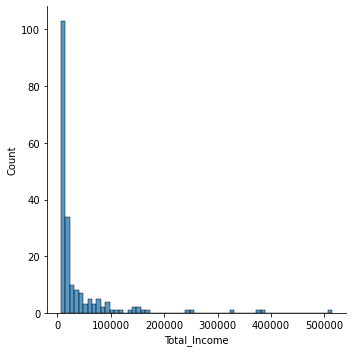

In [126]:
sns.displot(fi['Total_Income'].head(200))
plt.show()

# Observation--> data looks positively skewed 

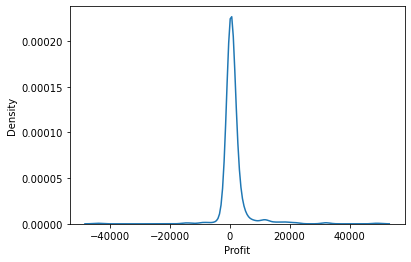

<Figure size 1800x1440 with 0 Axes>

In [119]:
sns.kdeplot(fi['Profit'])
plt.show()

# Observation--> data is having symmetric distribution 

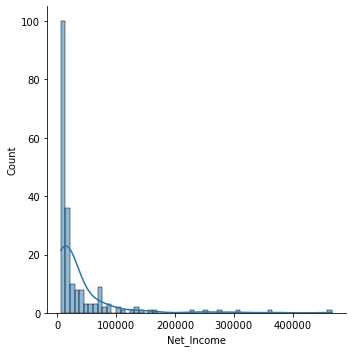

In [156]:
sns.displot(fi['Net_Income'].head(200),kde=True)
plt.show()

# Observation--> data looks positively skewed 

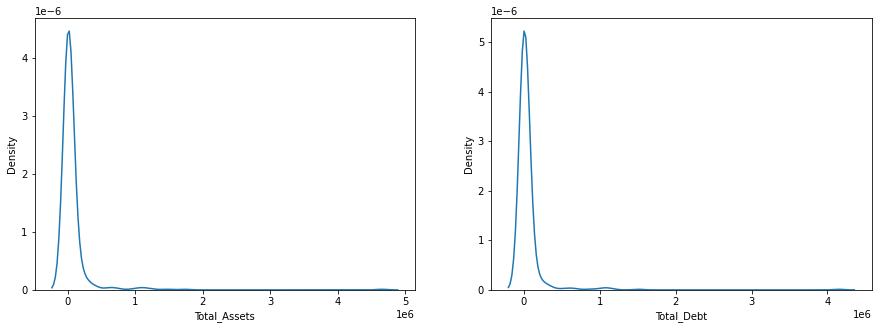

In [157]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.kdeplot(fi['Total_Assets'])
plt.subplot(1,2,2)
sns.kdeplot(fi['Total_Debt'])
plt.show()

# Observation--> data looks positively & right skewed having more outliers

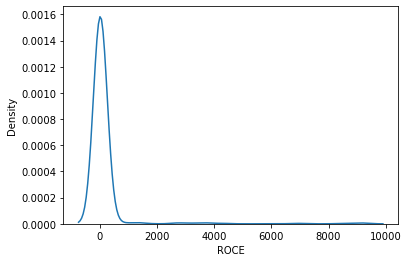

In [154]:
sns.kdeplot(fi['ROCE'])
plt.show()

# Observation--> data looks positively & right skewed having more outliers

## Graphical Analysis
- The graphical analysis is the method of analysis which performs graphing by taking the input from the data frame.


In [160]:
fi.head()

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
4,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0


### Univariate Analysis

In [14]:
fi['Sector'].unique()

array(['Oil & gas', 'Banks', 'Auto', 'IT services', 'Metals',
       'Engineering', 'NBFC', 'Power', 'Telecom services',
       'Mining & minerals', 'Diversified', 'Auto ancillaries', 'FMCG',
       'Cement', 'Fertilisers & agrochem', 'Pharma', 'Financial services',
       'Retail', 'Infrastructure', 'Oil & Gas', 'Gems & jewellery',
       'Aviation', 'Telecom (Ancillaries)', 'Electronics', 'Trading',
       'Power Services', 'Consumer durables', 'Services', 'Chemicals',
       'Healthcare', 'Logistics', 'Construction', 'Packaging', 'Textiles',
       'Real estate', 'Power services', 'Plastics', 'Real Estate',
       'Media & entertainment', 'Power - Renewables',
       'Logistics (ship building)', 'Gems & jewellery (refiner)',
       'Hospitality', 'IT Services', 'Mining (equipment)', 'Paper',
       'Logistics (Ship building)', 'Infotech', 'Consumer products',
       'Metals (pipes)', 'Holding Company'], dtype=object)

In [15]:
fi['Sector'].nunique()

51

In [16]:
count=pd.DataFrame((fi['Sector'].value_counts()).head(10))
count

,Sector
FMCG,43
Banks,42
NBFC,39
Pharma,32
Auto ancillaries,31
Metals,24
Auto,21
Consumer durables,20
Construction,18
Cement,17


In [17]:
sector_per=pd.DataFrame((((fi['Sector'].value_counts())/500)*100).head(10))
sector_per

,Sector
FMCG,8.6
Banks,8.4
NBFC,7.8
Pharma,6.4
Auto ancillaries,6.2
Metals,4.8
Auto,4.2
Consumer durables,4.0
Construction,3.6
Cement,3.4


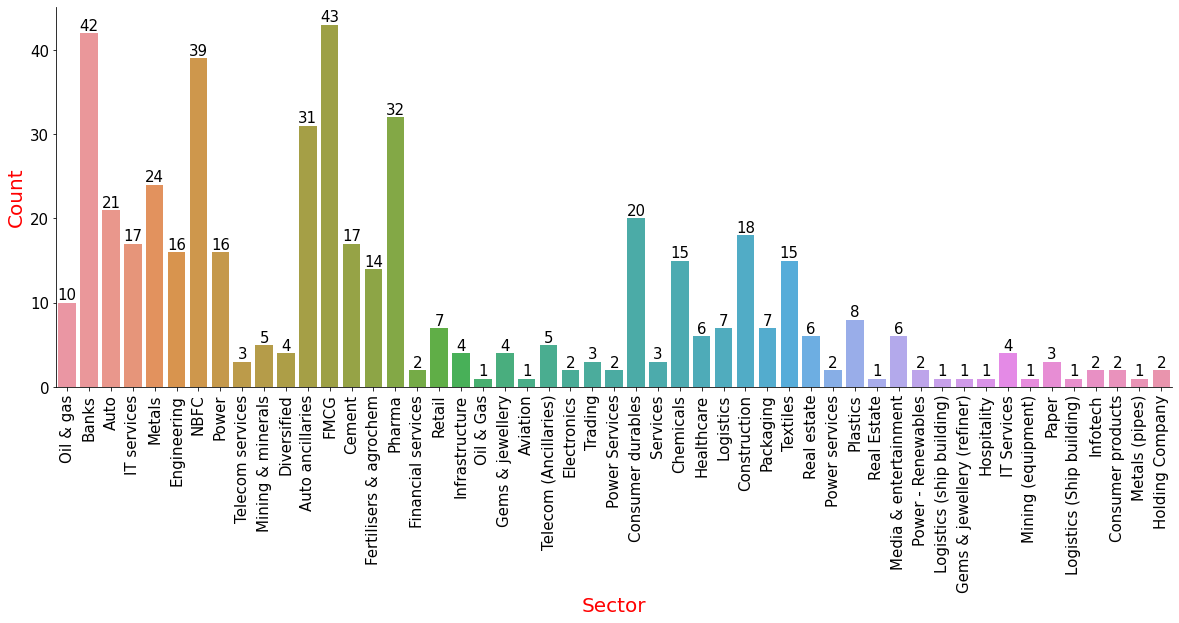

In [18]:
plt.figure(figsize=(20, 7))
p=sns.countplot(x=fi.Sector)
plt.xticks(rotation = 90)
p.set_xlabel("Sector", fontsize = 20,color='r')
p.set_ylabel("Count", fontsize = 20,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
p.bar_label(p.containers[0],size=15)
sns.despine() 
plt.show()

### Bivariate Analysis

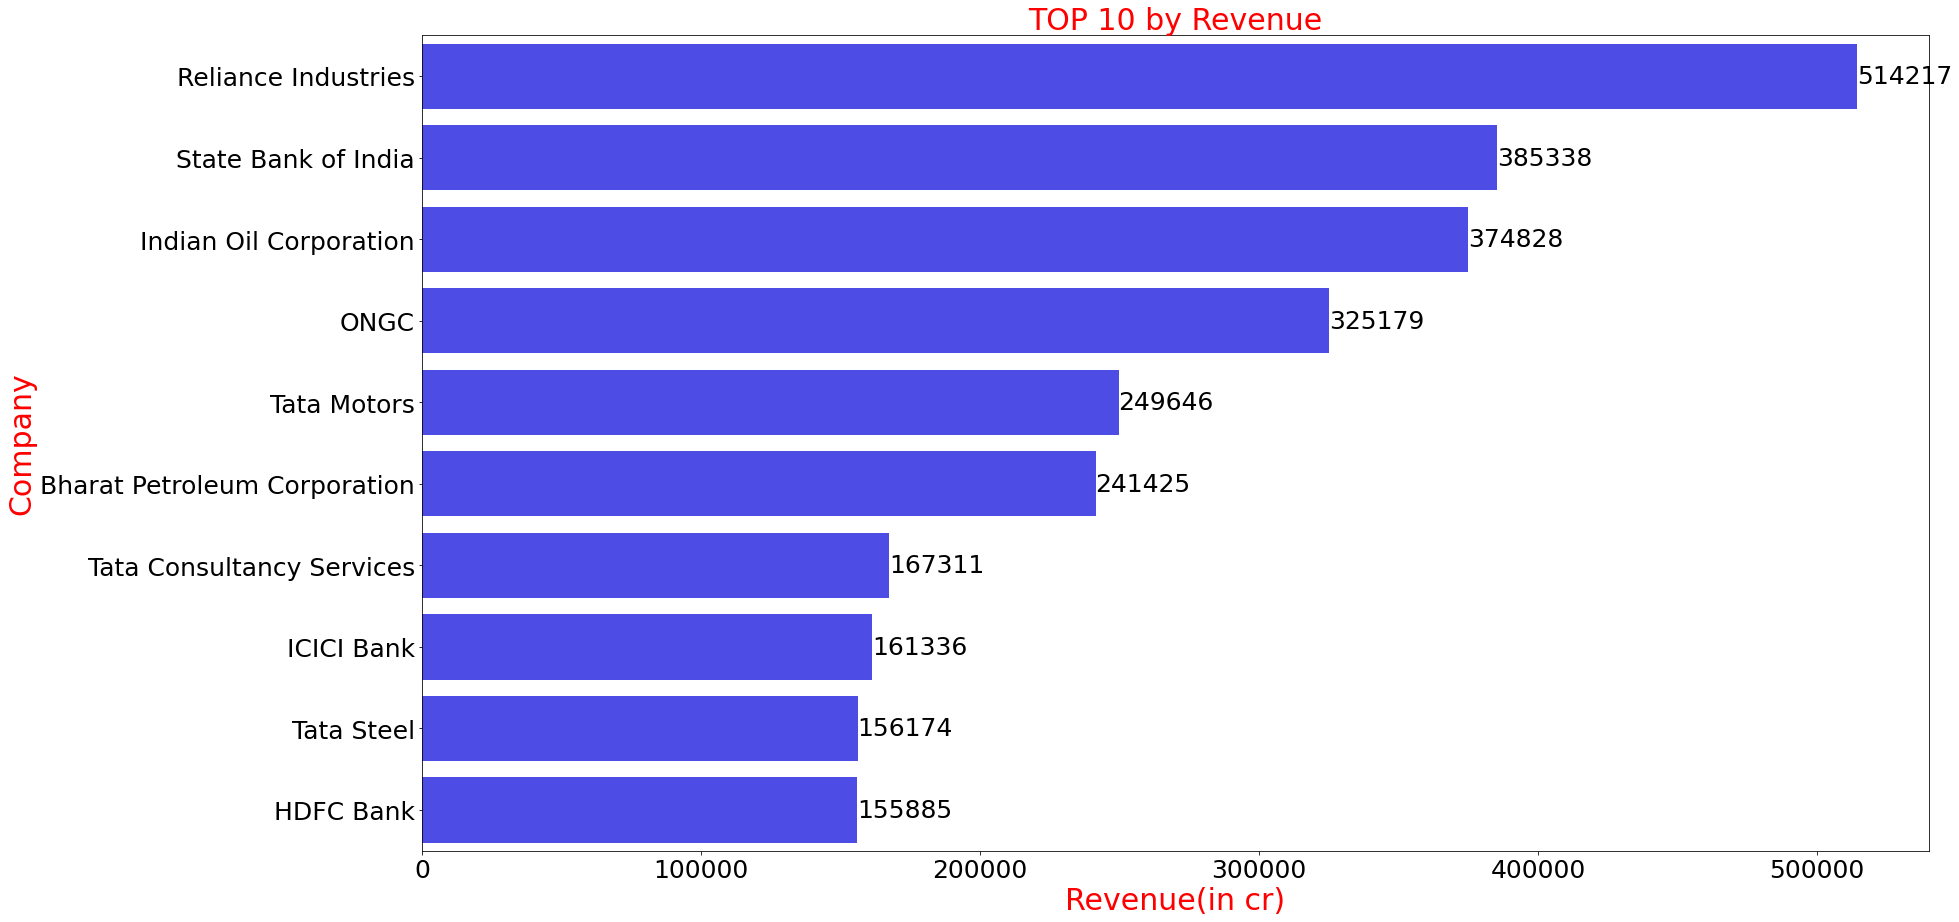

In [236]:
plt.figure(figsize=(27, 15))
p=sns.barplot(y=ds.Company.head(10),x=ds.Total_Income.head(10),color='b',alpha=0.8)
p.set_xlabel("Revenue(in cr)", fontsize = 30,color='r')
p.set_ylabel("Company", fontsize = 30,color='r')
p.set_title("TOP 10 by Revenue", fontsize = 30,color='r')
plt.xticks(size=25)
plt.yticks(size=25)
p.bar_label(p.containers[0],size=25)
plt.show()

In [261]:
sort_profit=ds.sort_values('Profit',ascending=False).head(10)
sort_profit

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
6,7,Tata Consultancy Services,IT services,167311,164177,32430,7795.0,97129.0,47.10,488649.0
9,10,HDFC Bank,Banks,155885,128552,31833,1511418.0,1721861.0,1.97,120093.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
15,16,Infosys,IT services,102673,100472,19351,5325.0,84384.0,37.08,259619.0
11,12,HDFC,NBFC,145993,139034,18740,447013.0,612631.0,9.23,3226.0
7,8,ICICI Bank,Banks,161336,89163,18384,1103840.0,1474196.0,1.33,98750.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
5,6,Bharat Petroleum Corporation,Oil & gas,241425,230163,16165,54532.0,110304.0,17.62,9251.0


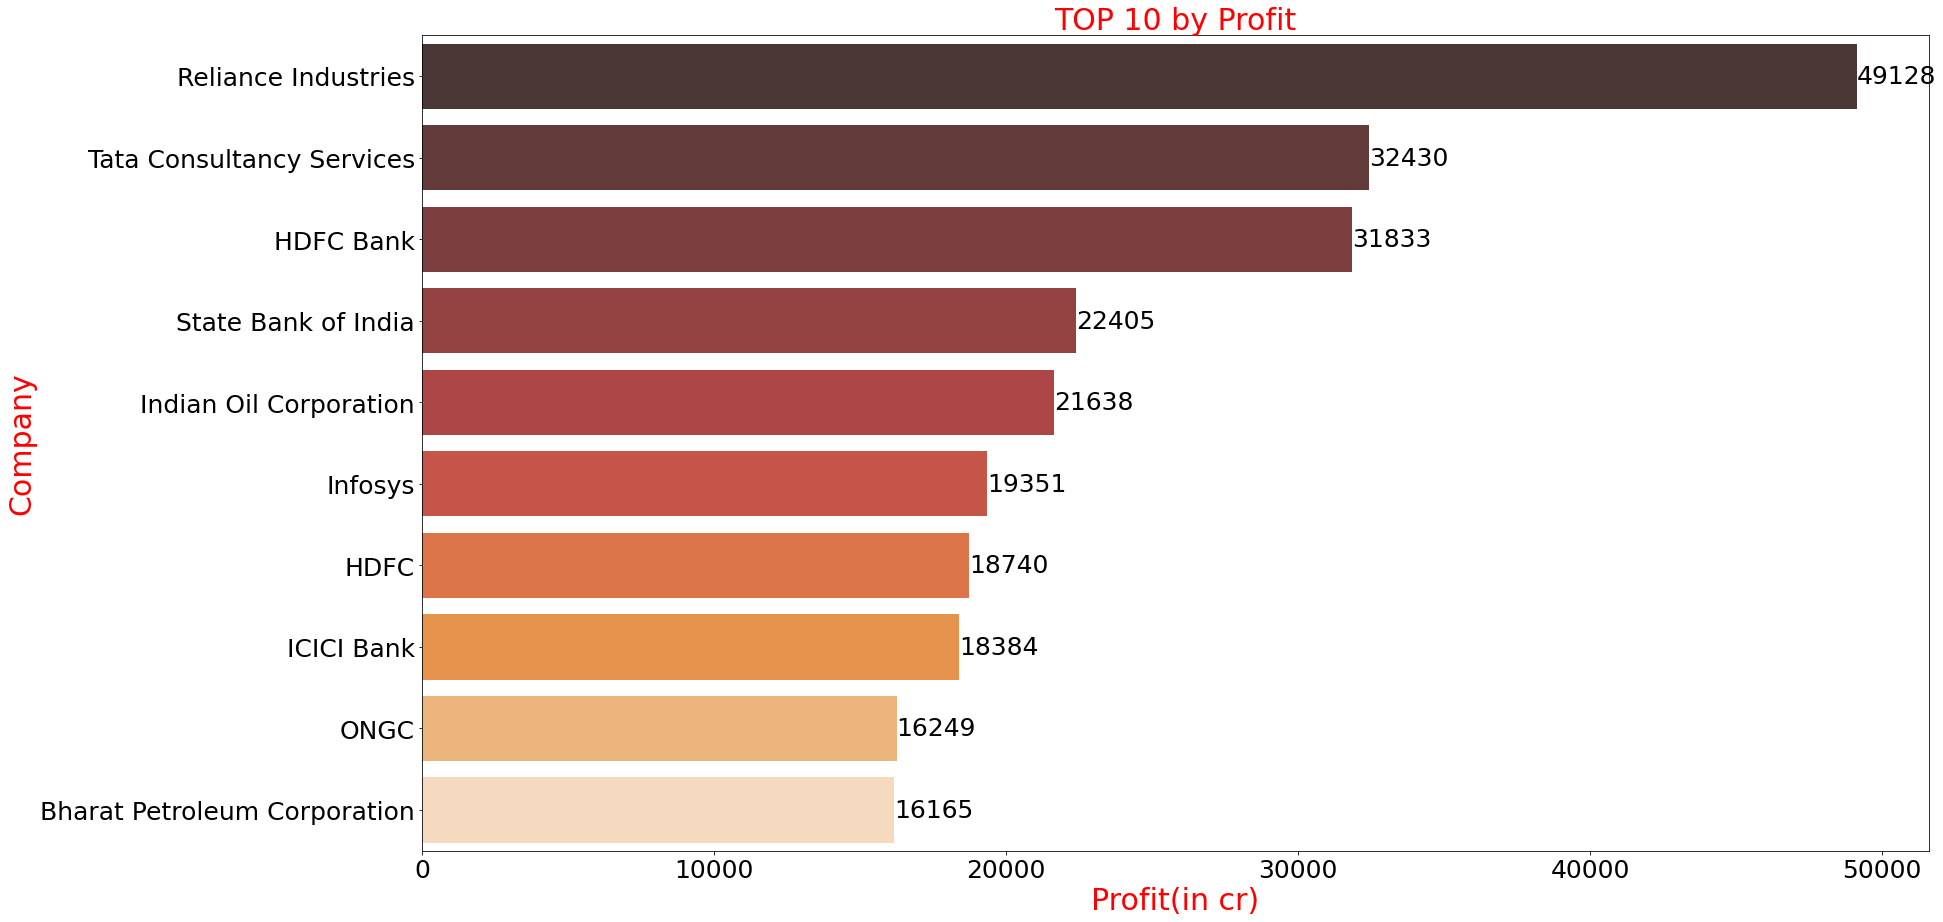

In [264]:
plt.figure(figsize=(27, 15))
p=sns.barplot(y=sort_profit.Company,x=sort_profit.Profit,color='b',alpha=0.8,palette='gist_heat')
p.set_ylabel("Company", fontsize = 30,color='r')
p.set_xlabel("Profit(in cr)", fontsize = 30,color='r')
p.set_title("TOP 10 by Profit", fontsize = 30,color='r')
plt.xticks(size=25)
plt.yticks(size=25)
p.bar_label(p.containers[0],size=25)
plt.show()

In [265]:
ds.head(5)

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648.0,1094771.0,7.81,236334.0
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
2,3,Indian Oil Corporation,Oil & gas,374828,363950,21638,116653.0,234495.0,14.55,31648.0
3,4,ONGC,Oil & gas,325179,304001,16249,133187.0,418978.0,9.18,28479.0
4,5,Tata Motors,Auto,249646,249795,-13451,142131.0,227426.0,5.07,50837.0


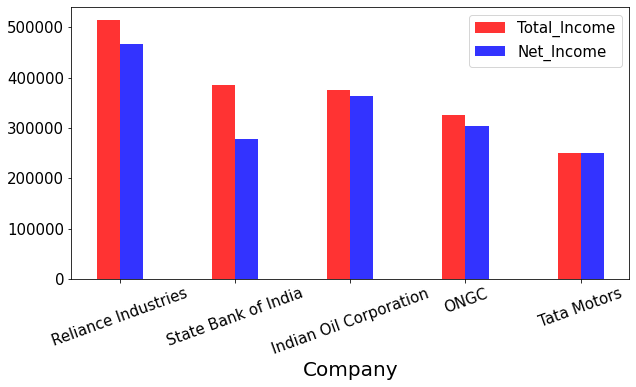

In [306]:
plt.figure(figsize=(10, 5))
width=0.2
p=np.arange(len(ds.Company.head(5)))
p1=[j+width for j in p]

plt.xlabel('Company',fontsize=20)   
plt.ylabel('',fontsize=15)

  
plt.bar(p,ds.Total_Income.head(5),width,color='r',label='Total_Income',alpha=0.8)
plt.bar(p1,ds.Net_Income.head(5),width,color='b',label='Net_Income',alpha=0.8)

plt.xticks(p+width/2,ds.Company.head(5),rotation=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)
plt.show()

In [90]:
sort_debt=fi.sort_values('Total_Debt',ascending=False).head(5)
sort_debt

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
1,2,State Bank of India,Banks,385338,278115,22405,4149127.0,4653343.0,0.52,245652.0
9,10,HDFC Bank,Banks,155885,128552,31833,1511418.0,1721861.0,1.97,120093.0
17,18,Punjab National Bank,Banks,94991,81866,2562,1166015.0,1259036.0,0.24,101802.0
7,8,ICICI Bank,Banks,161336,89163,18384,1103840.0,1474196.0,1.33,98750.0
20,21,Bank of Baroda,Banks,89001,74314,1548,1067173.0,1149999.0,0.13,82000.0


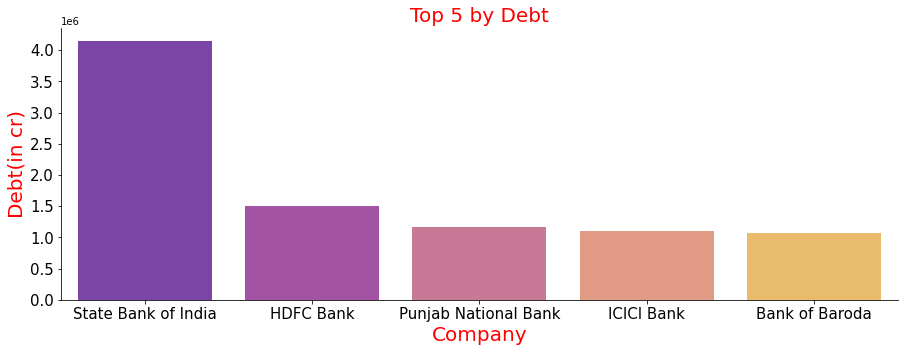

In [93]:
plt.figure(figsize=(15, 5))
p=sns.barplot(x=sort_debt.Company,y=sort_debt.Total_Debt,color='b',alpha=0.8,palette='plasma')
p.set_xlabel("Company", fontsize = 20,color='r')
p.set_ylabel("Debt(in cr)", fontsize = 20,color='r')
p.set_title("Top 5 by Debt", fontsize = 20,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine()
plt.show()

In [443]:
sort_asset=fi.sort_values('Total_Assets',ascending=False).head(10)
sort_asset

,Rank_2021,Company,Sector,Total_Income,Net_Income,Profit,Total_Debt,Total_Assets,ROCE,Employees
1,2,State Bank of India,Banks,385338,278115,22405,4149127,4653343,0.52,245652
9,10,HDFC Bank,Banks,155885,128552,31833,1511418,1721861,1.97,120093
7,8,ICICI Bank,Banks,161336,89163,18384,1103840,1474196,1.33,98750
17,18,Punjab National Bank,Banks,94991,81866,2562,1166015,1259036,0.24,101802
20,21,Bank of Baroda,Banks,89001,74314,1548,1067173,1149999,0.13,82000
18,19,Canara Bank,Banks,93660,70213,2891,1060998,1124201,0.32,88213
0,1,Reliance Industries,Oil & gas,514217,466924,49128,270648,1094771,7.81,236334
21,22,Union Bank of India,Banks,83211,69311,2863,977576,1042314,0.36,78202
22,23,Axis Bank,Banks,80848,64696,7196,859872,963640,0.78,78307
28,29,Power Finance Corporation,NBFC,71707,71656,11748,659682,741472,9.45,483


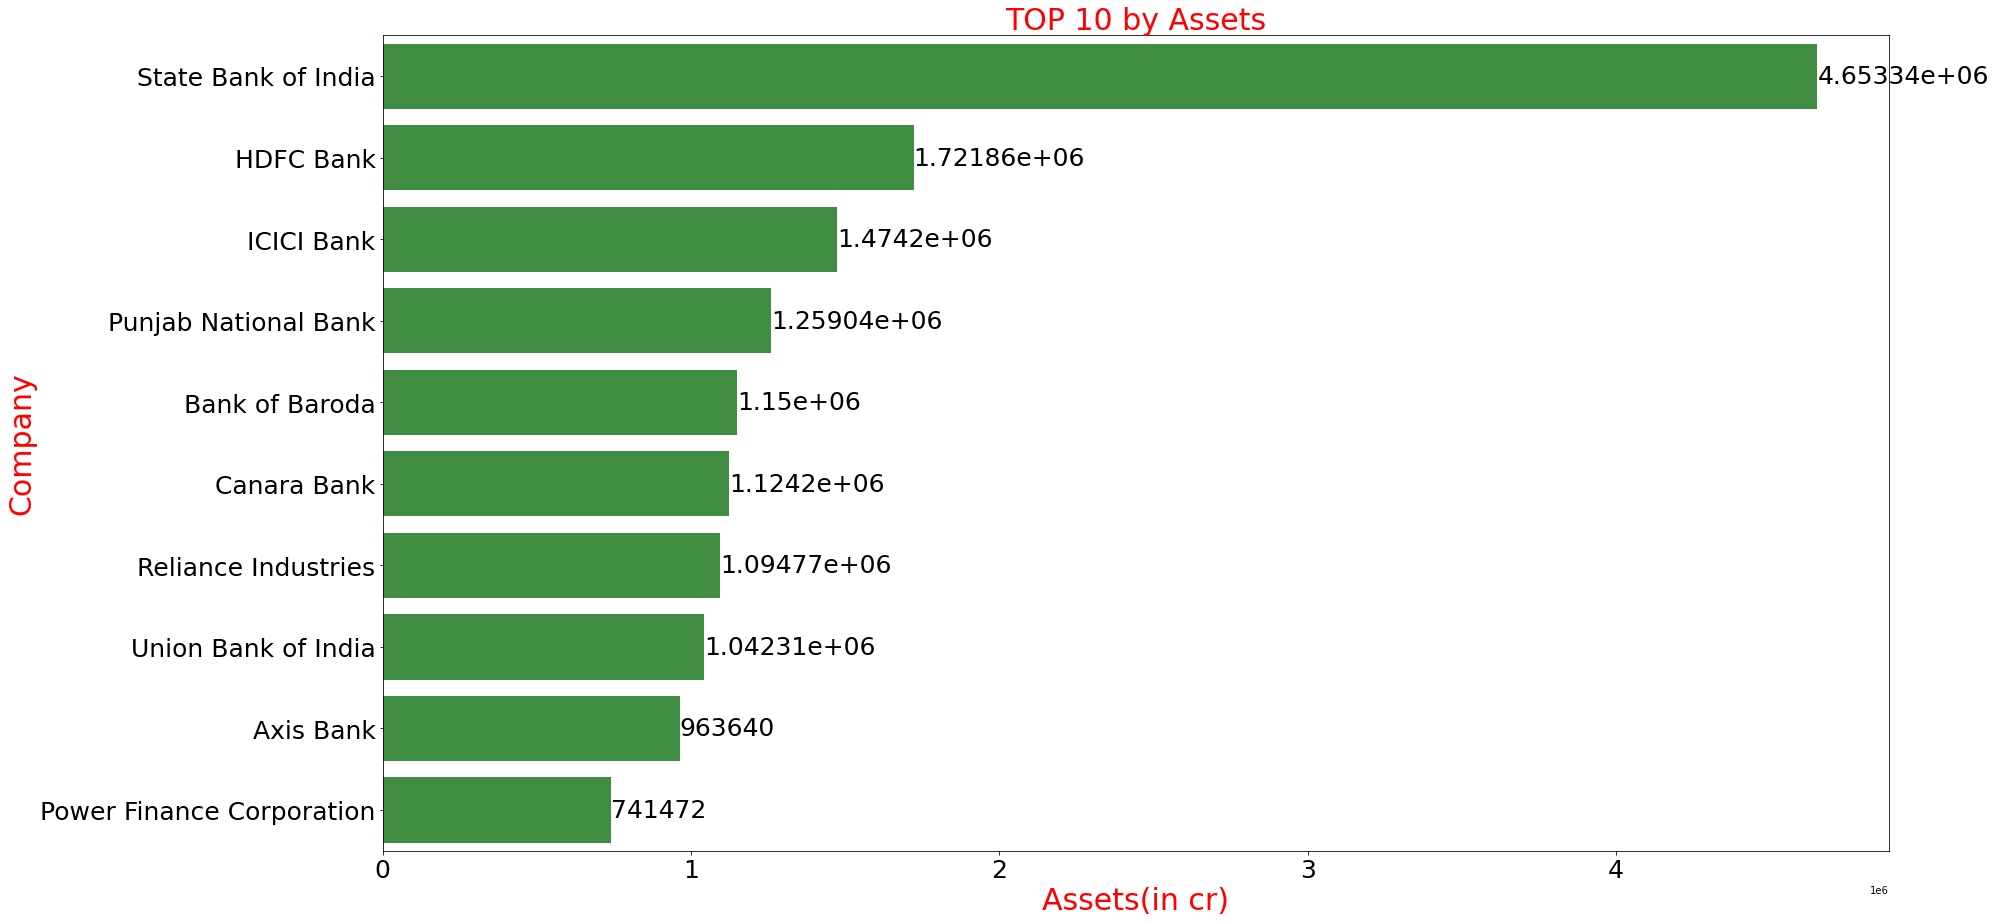

In [444]:
plt.figure(figsize=(27, 15))
p=sns.barplot(y=sort_asset.Company.head(10),x=sort_asset.Total_Assets.head(10),color='g',alpha=0.8)
p.set_xlabel("Assets(in cr)", fontsize = 30,color='r')
p.set_ylabel("Company", fontsize = 30,color='r')
p.set_title("TOP 10 by Assets", fontsize = 30,color='r')
plt.xticks(size=25)
plt.yticks(size=25)
p.bar_label(p.containers[0],size=25)
plt.show()

In [63]:
rev=fi.pivot_table(values=['Total_Income'],index=['Sector'],aggfunc='sum')
revenue=rev.sort_values(by=['Total_Income'],ascending=False).head(5)
revenue

,Total_Income
Sector,
Banks,1652220
Oil & gas,1625587
Metals,669247
Auto,656887
NBFC,645108


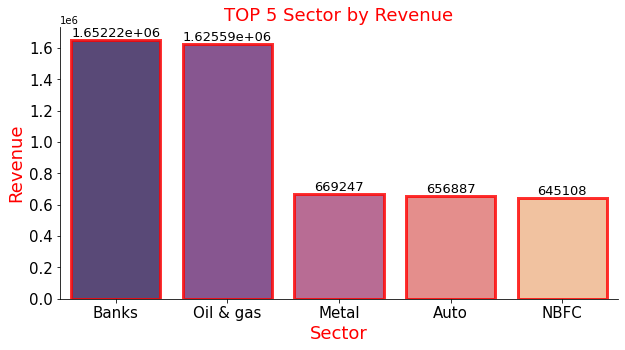

In [64]:
plt.figure(figsize=(10, 5))
p=sns.barplot(y=revenue.Total_Income,x=['Banks','Oil & gas','Metal','Auto','NBFC'],color='b',alpha=0.8,edgecolor='r',linewidth=3,palette='magma')
p.set_xlabel("Sector", fontsize = 18,color='r')
p.set_ylabel("Revenue", fontsize = 18,color='r')
p.set_title("TOP 5 Sector by Revenue", fontsize = 18,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
p.bar_label(p.containers[0],size=13)
sns.despine()
plt.show()

In [65]:
profit=fi.pivot_table(values=['Profit'],index=['Sector'],aggfunc='sum')
profit=profit.sort_values(by=['Profit'],ascending=False).head(5)
profit

,Profit
Sector,
Banks,127671
Oil & gas,116113
IT services,84270
NBFC,66786
FMCG,45459


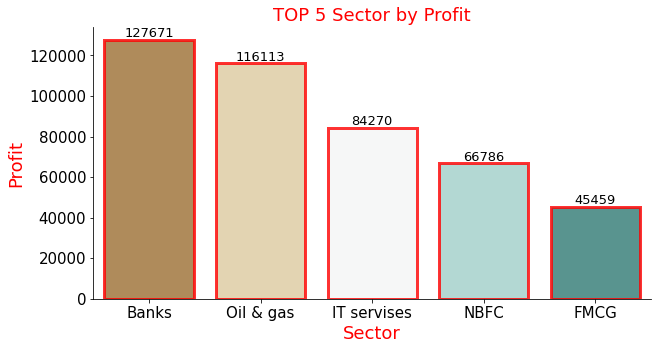

In [66]:
plt.figure(figsize=(10, 5))
p=sns.barplot(y=profit.Profit,x=['Banks','Oil & gas','IT servises','NBFC','FMCG'],color='b',alpha=0.8,edgecolor='r',linewidth=3,palette='BrBG')
p.set_xlabel("Sector", fontsize = 18,color='r')
p.set_ylabel("Profit", fontsize = 18,color='r')
p.set_title("TOP 5 Sector by Profit", fontsize = 18,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
p.bar_label(p.containers[0],size=13)
sns.despine()
plt.show()

In [67]:
emp=fi.pivot_table(values=['Employees'],index=['Sector'],aggfunc='sum')
emp=emp.sort_values(by=['Employees'],ascending=False).head(5)
emp

,Employees
Sector,
Banks,1410892.0
IT services,1278363.0
Services,499770.0
Oil & gas,316052.0
Pharma,310414.0


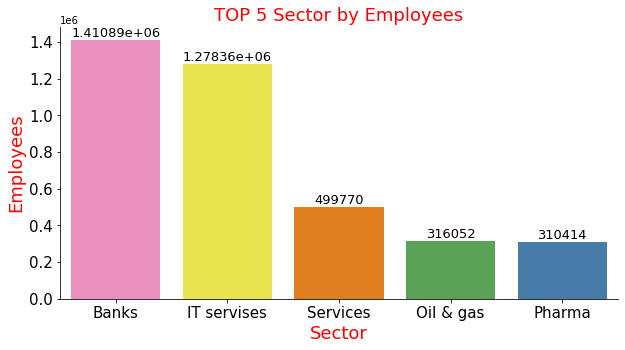

In [78]:
plt.figure(figsize=(10, 5))
p=sns.barplot(y=emp.Employees,x=['Banks','IT servises','Services','Oil & gas','Pharma'],color='b',alpha=1,palette='Set1_r')
p.set_xlabel("Sector", fontsize = 18,color='r')
p.set_ylabel("Employees", fontsize = 18,color='r')
p.set_title("TOP 5 Sector by Employees", fontsize = 18,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
p.bar_label(p.containers[0],size=13)
sns.despine()
plt.show()

In [81]:
debt=fi.pivot_table(values=['Total_Debt'],index=['Sector'],aggfunc='sum')
debt=debt.sort_values(by=['Total_Debt'],ascending=False).head(5)
debt

,Total_Debt
Sector,
Banks,17049938.0
NBFC,3745870.0
Power,642796.0
Oil & gas,601307.0
Metals,371379.0


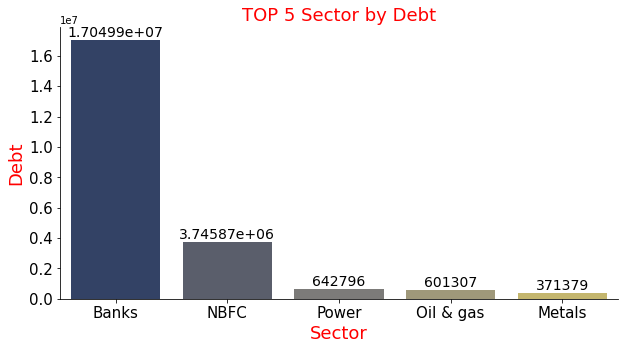

In [86]:
plt.figure(figsize=(10, 5))
p=sns.barplot(y=debt.Total_Debt,x=['Banks','NBFC','Power','Oil & gas','Metals'],color='b',alpha=1,palette='cividis')
p.set_xlabel("Sector", fontsize = 18,color='r')
p.set_ylabel("Debt", fontsize = 18,color='r')
p.set_title("TOP 5 Sector by Debt", fontsize = 18,color='r')
plt.xticks(size=15)
plt.yticks(size=15)
p.bar_label(p.containers[0],size=14)
sns.despine()
plt.show()

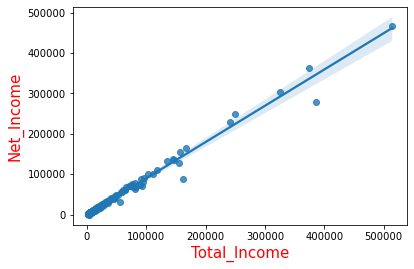

In [84]:
p=sns.regplot(x='Total_Income',y='Net_Income',data=fi)
p.set_xlabel('Total_Income',fontsize = 15,color='r')
p.set_ylabel('Net_Income',fontsize = 15,color='r')

plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

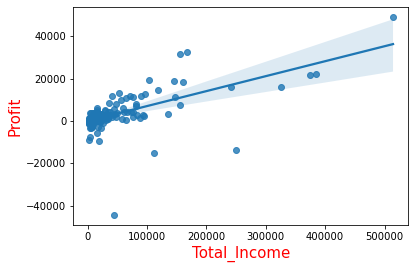

In [104]:
p=sns.regplot(x='Total_Income',y='Profit',data=fi)
p.set_xlabel('Total_Income',fontsize = 15,color='r')
p.set_ylabel('Profit',fontsize = 15,color='r')

plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

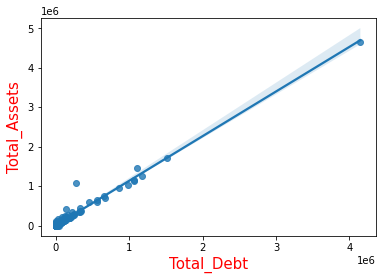

In [103]:
p=sns.regplot(x='Total_Debt',y='Total_Assets',data=fi)
p.set_xlabel('Total_Debt',fontsize = 15,color='r')
p.set_ylabel('Total_Assets',fontsize = 15,color='r')

plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

### Multivariate Analysis

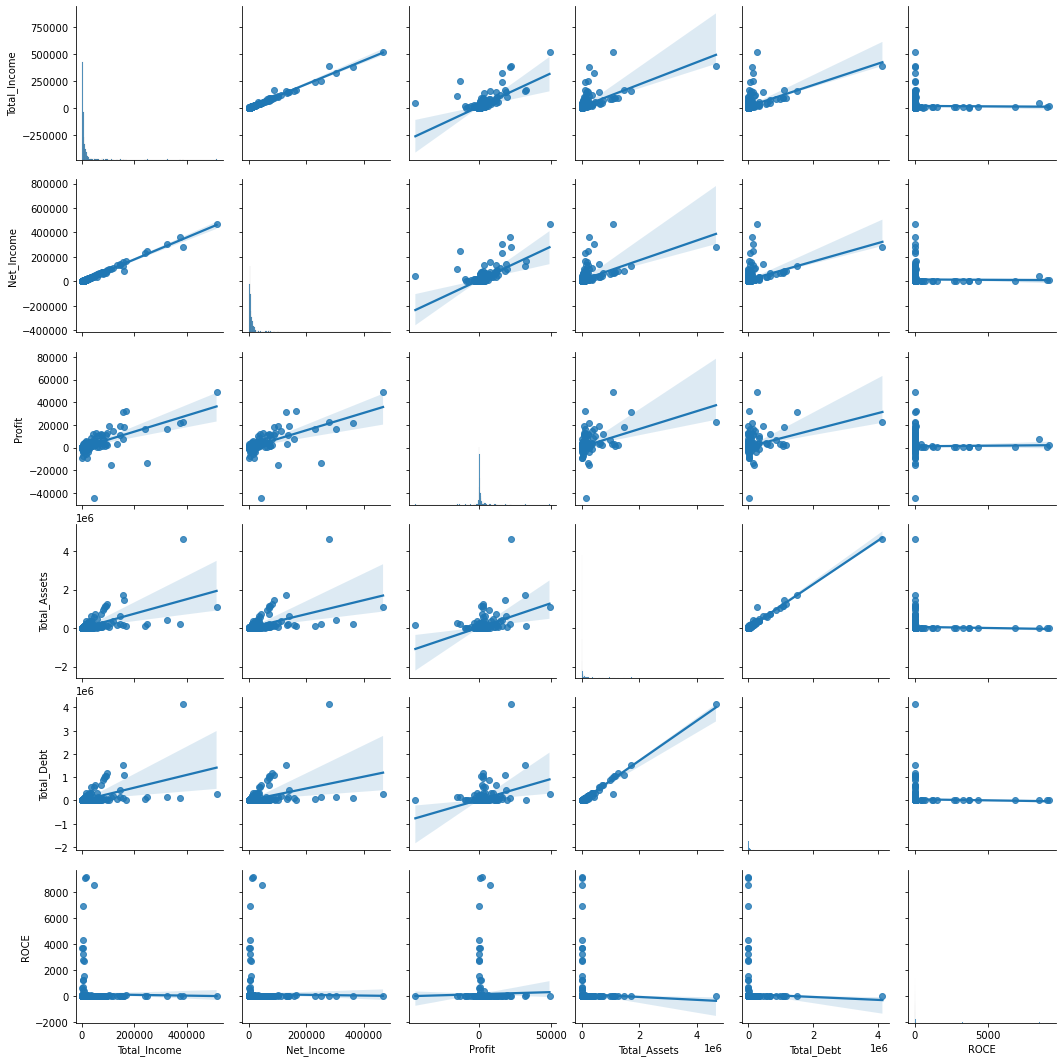

In [178]:
sns.pairplot(fi,vars=['Total_Income','Net_Income','Profit','Total_Assets','Total_Debt','ROCE'],kind='reg')
plt.show()

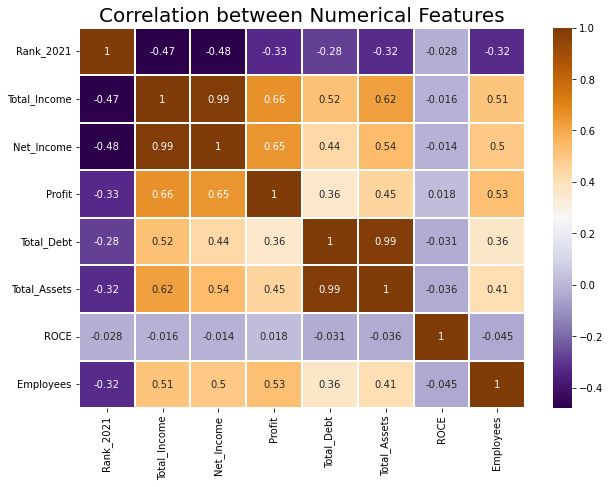

In [184]:
sns.heatmap(fi.corr(),annot=True,cmap='PuOr_r',linewidth=0.3)
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.title('Correlation between Numerical Features',size=20,color='black')
plt.show()

- It is a statistical technique that can be used to analyze the relationship between a single dependent variable ana several independent variables.
- **Heat Map** analysis is a process of reviewing and analyzing heat map data to gather insights about user interaction and behavior as they engage with your product.
- This image is also used to find out the correlation of the particular columns.


## Challenges...

- One of the major challenge I have faced during scraping the web page. I was getting the data in column wise but had to get data in row manner. In order to tackle this problem I used slicing method while making a dataframe and came up with the exact result which I was looking for for the further the analysis.
- Replacing null values with a accurate data is an another challenge.


## Outcomes...

- In this project, I have analysed about the fortune 500 companies across India.
- Through all the data collected, and through all the plots drawn I got to know that **Reliance** is dominating across India when it comes to revenue generation and profit making in 2021 ranking.
- Companies belong to **FMCG** sector are more in this list.
- If I look sector wise performance then **Banks & Oil & gas sector** holds the high revenue and profit making sectors.
- I also got to know there is strong relation between **debt & assets** because the more the debt, the higher the assets you can have for the organisation thereby revenue will be increased.
